In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Features of the Dataset**
- carat: weight of the diamond
- cut: describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal - - 
- color: color of the diamond, with D being the best and J the worst
- clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- depth: the height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- table: the width of the diamond's table expressed as a percentage of its average diameter
- price: the price of the diamond
- x: length (mm)
- y: width (mm)
- z: depth (mm)

In [2]:
df=pd.read_csv('./diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df = df.drop("Unnamed: 0",axis = 1)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#no missing values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### **Feature Engineering**

Lets look at each columns and pattern in them

In [9]:
# call all object colums
df1=df.select_dtypes(include=['object'])
for c in df1.columns:
    print("------- %s ------" % c)
    print(df1[c].value_counts())

------- cut ------
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
------- color ------
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
------- clarity ------
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#remove x=y=z=0 as there is no use of keeping rows that has length, width and height of diamond are zero 
#there are around 7 rows with 0 so we can remove it
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]
df.shape


(53920, 10)

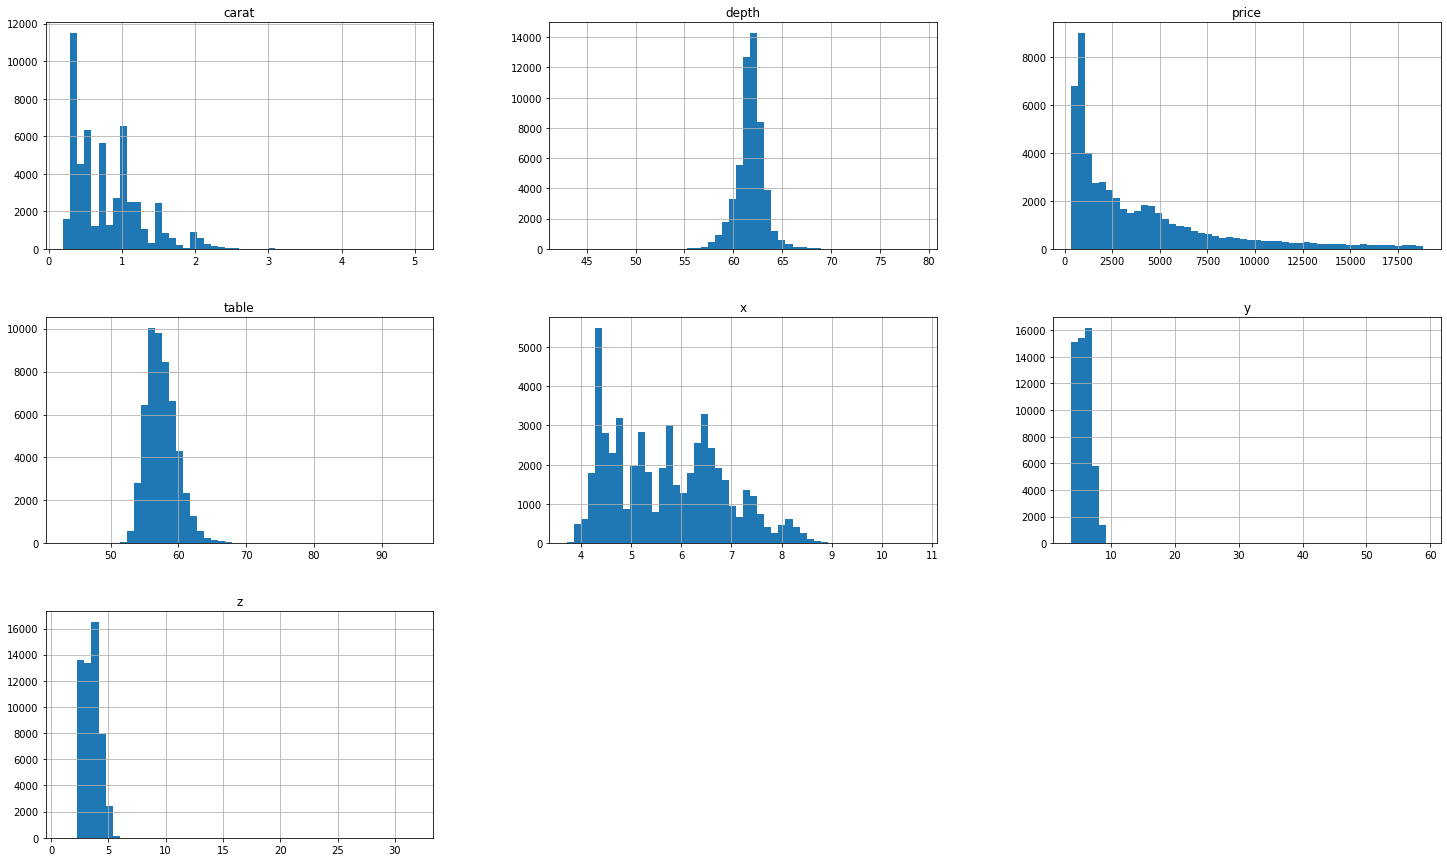

In [12]:
df.hist(bins=50,figsize=(25,15))
plt.show()

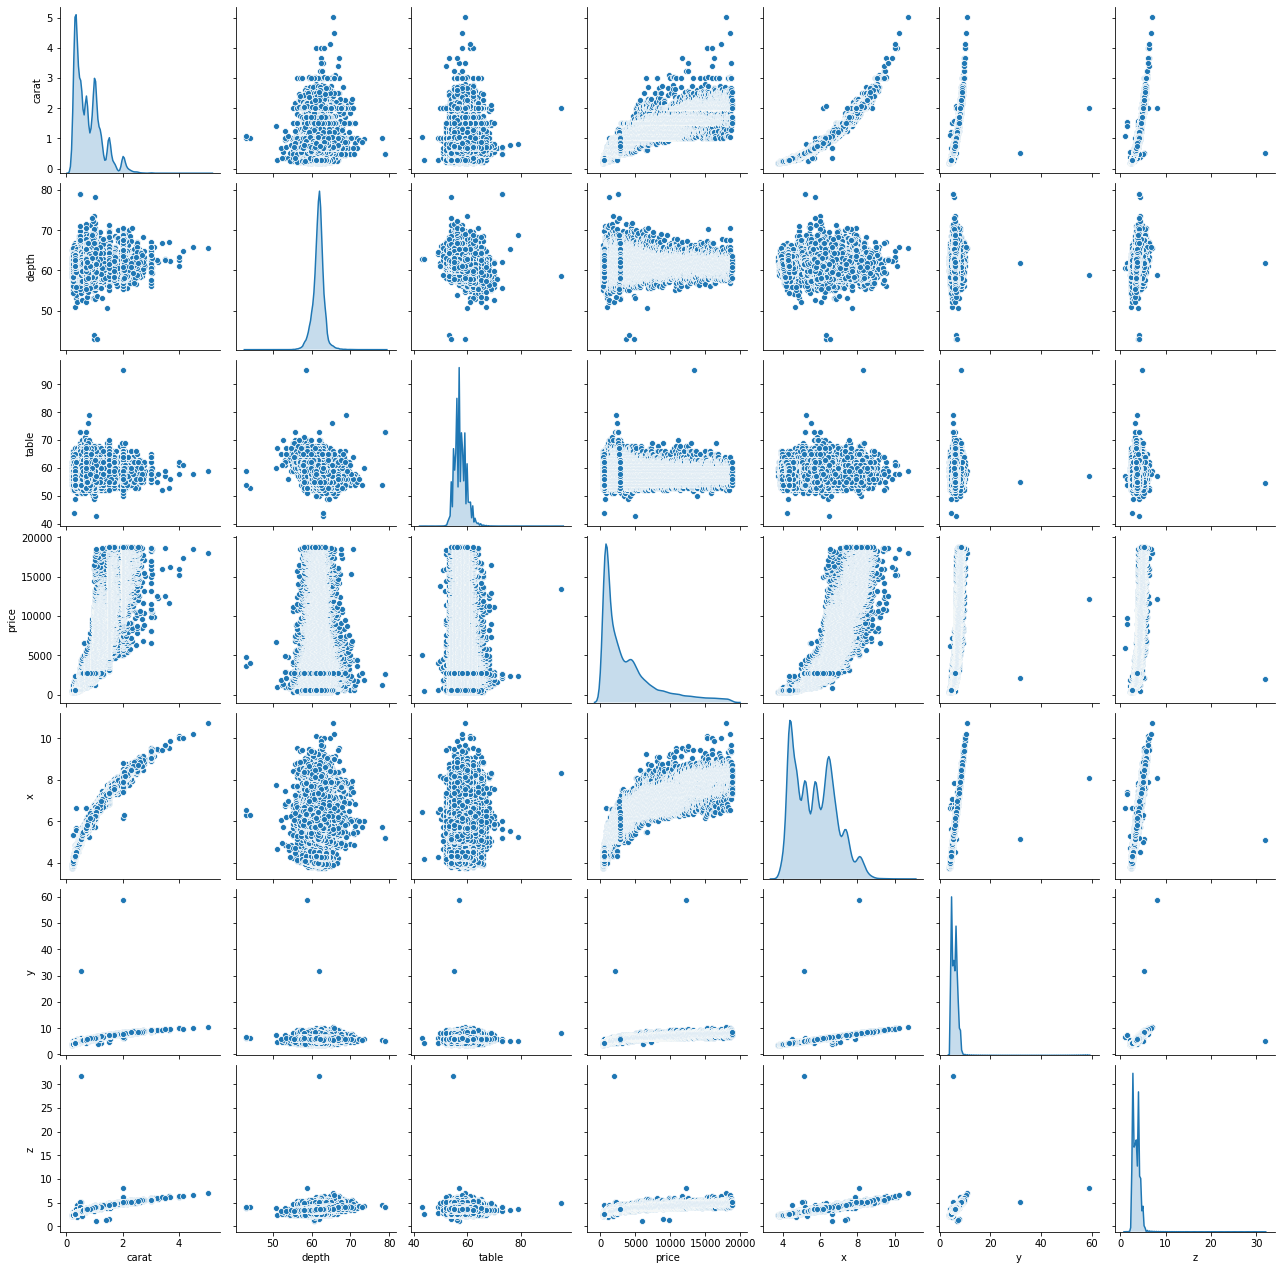

In [13]:
sns.pairplot(df , diag_kind = 'kde')

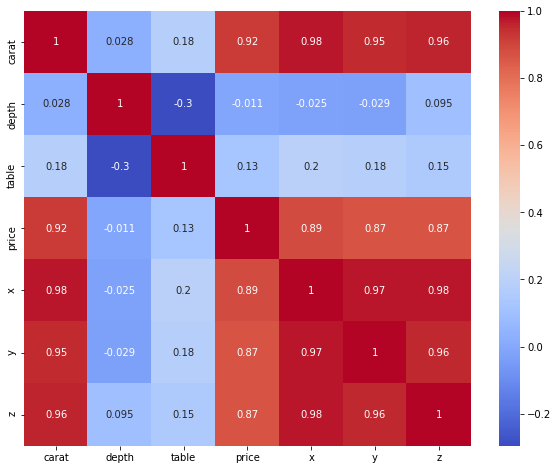

In [14]:
plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

x,y,z seems to be highly correlated  
carat and price of diamond are highly correlated

lets check taht relation using bargraph

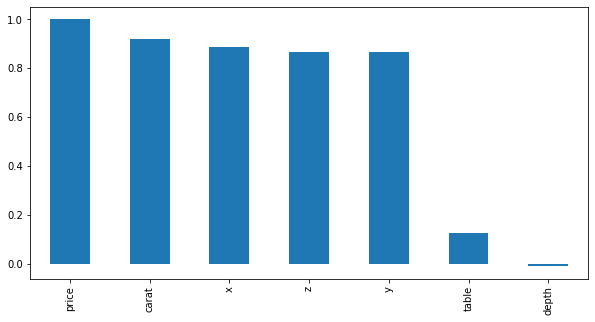

In [15]:
plt.figure(figsize = (10,5))
df.corr()['price'].sort_values(ascending = False).plot(kind = 'bar');

so our Target varibale`Price`is highly correlated with carat,x,y,z

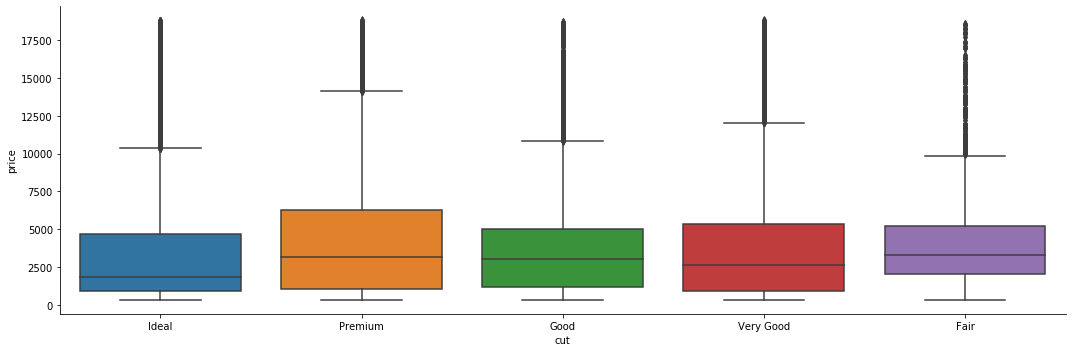

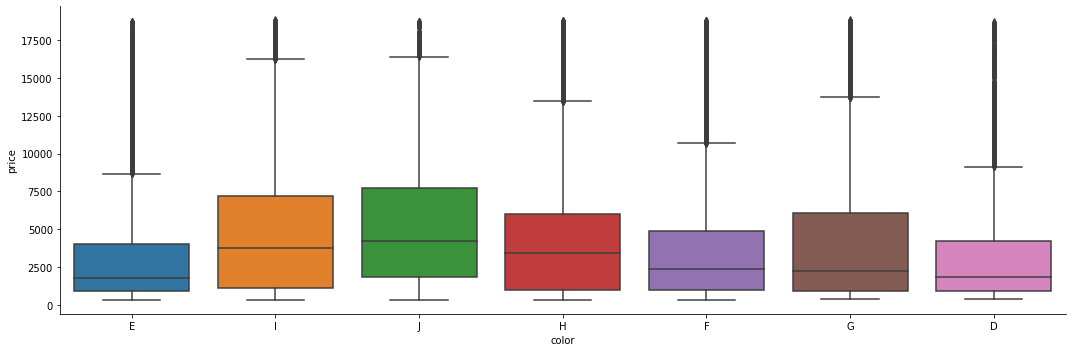

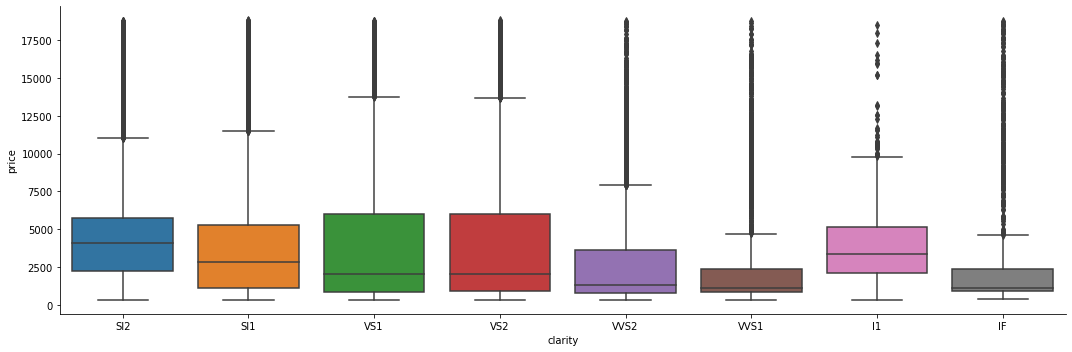

In [16]:
cat_columns = df.select_dtypes(include = ['object']).columns.tolist()
for col in cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=df);
    

### Splitting the dataset 
- Split the dataset into Test set (80%) and Train set (20%). The test set allows our model to make predictions on values that it hasn't seen before.

- taking random samples from our dataset can introduce significant sampling bias. 
- Therefore, in order to avoid sampling bias, the data will be divide into different homogenous subgroups called strata. This is called Stratified Sampling. 
- Since, we know that carat is the most important parameter to predict the price of the diamonds we will use it for Stratified sampling

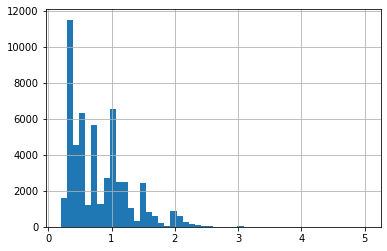

In [17]:
df["carat"].hist(bins = 50)
plt.show()

In [18]:
print(df.carat.max())
print(df.carat.min())

5.01
0.2


In [19]:
# Divide by 0.4 to limit the number of carat strata

df["carat_cat"] = np.ceil(df["carat"]/0.4)

# Label those above 5 as 5
df["carat_cat"].where(df["carat_cat"] < 5, 5.0, inplace = True)
df['carat_cat'].value_counts()

2.0    17018
1.0    14391
3.0    13364
4.0     5905
5.0     3242
Name: carat_cat, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df["carat_cat"]):
    TrainSet = df.reindex(train_index)
    TestSet = df.reindex(test_index)
    

In [21]:
print(TrainSet.shape)
print(TestSet.shape)

(43136, 11)
(10784, 11)


In [22]:
TestSet["carat_cat"].value_counts() / len(TestSet)

2.0    0.319733
1.0    0.262797
3.0    0.242303
4.0    0.113131
5.0    0.061665
Name: carat_cat, dtype: float64

In [23]:
#drop carat column
for x in (TestSet, TrainSet):
    x.drop("carat_cat", axis=1,inplace = True)

In [24]:
TestSet.describe()

,carat,depth,table,price,x,y,z
count,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,0.800532,61.724740,57.460649,3965.325417,5.737451,5.744088,3.544304
std,0.477434,1.389682,2.224356,4052.416619,1.125351,1.229277,0.746454
min,0.200000,54.400000,44.000000,326.000000,3.810000,3.770000,1.530000
25%,0.400000,61.000000,56.000000,957.000000,4.720000,4.730000,2.920000
50%,0.700000,61.800000,57.000000,2385.500000,5.690000,5.700000,3.520000
75%,1.050000,62.500000,59.000000,5360.000000,6.550000,6.550000,4.040000
max,3.510000,72.900000,73.000000,18823.000000,9.660000,58.900000,31.800000


In [25]:
TrainSet.describe()

,carat,depth,table,price,x,y,z
count,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000,43120.000000
mean,0.797020,61.755819,57.455768,3922.955056,5.730147,5.732559,3.538973
std,0.472991,1.442835,2.236584,3971.679645,1.118199,1.116995,0.691282
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2402.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5315.000000,6.540000,6.530000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,31.800000,6.980000


#### Data visualisation

In [26]:
diamond1= TrainSet.copy()
#TrainSet.columns

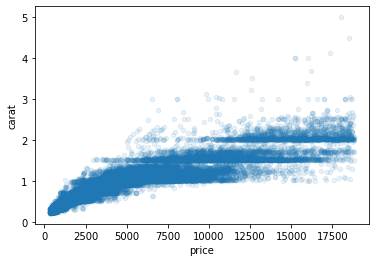

In [27]:
#scatter plot
diamond1.plot(kind="scatter", x="price", y="carat",alpha = 0.1)
plt.show()

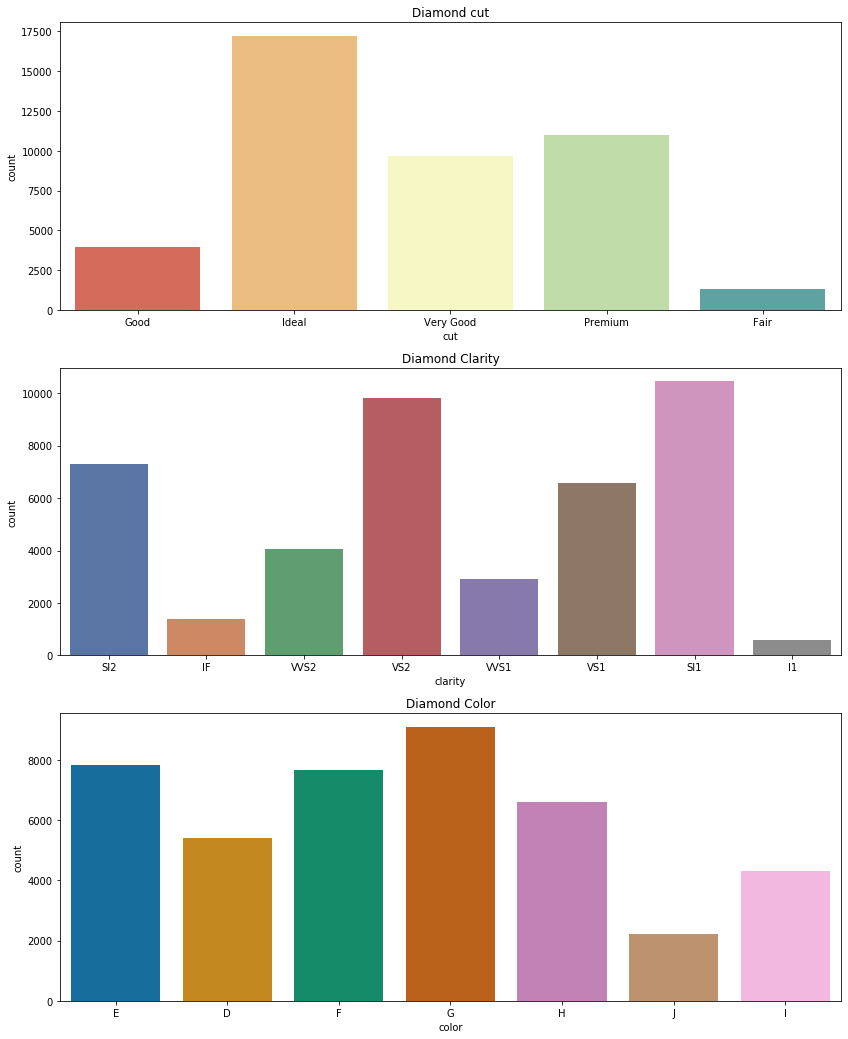

In [28]:
#count plot of categorical variable
fig,ax= plt.subplots(3, figsize=(14,18))
sns.countplot('cut',data = diamond1, ax=ax[0],palette="Spectral")
sns.countplot('clarity',data = diamond1, ax=ax[1],palette="deep")
sns.countplot('color',data = diamond1, ax=ax[2],palette="colorblind")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
#save_img("feature_count_plots")
plt.show()

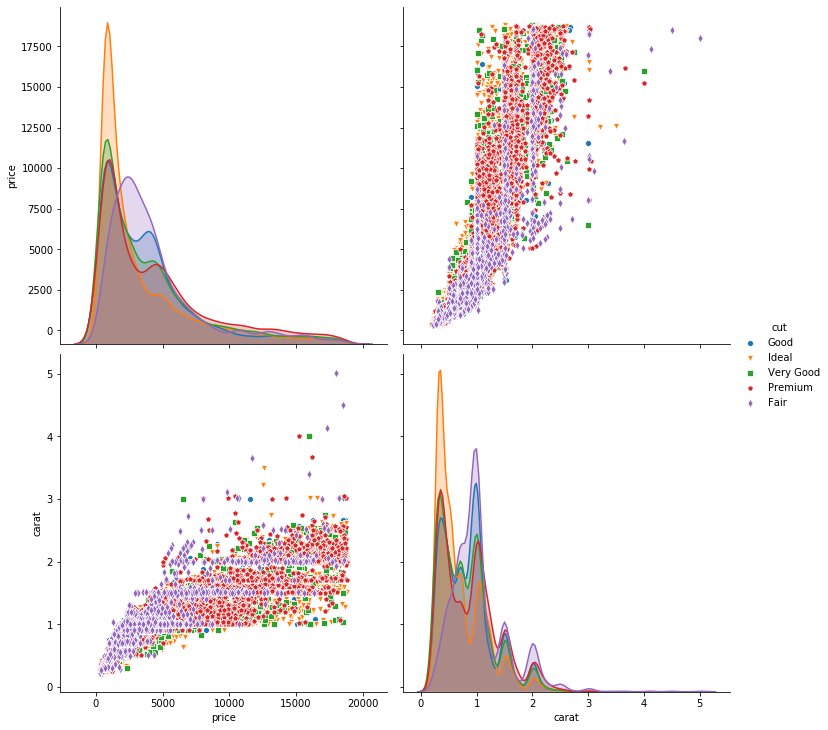

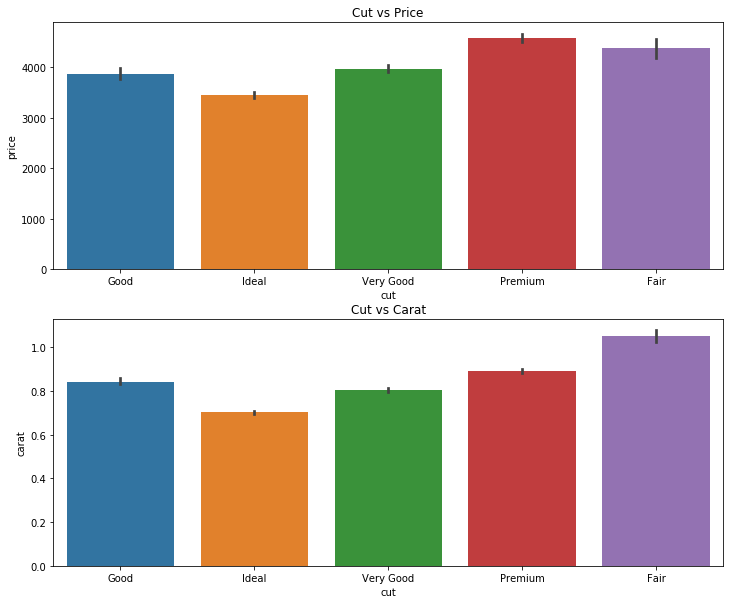

In [29]:
#Comparison of carat with price based on diamond cut
sns.pairplot(diamond1[["price","carat","cut"]], markers = ["o","v","s","p","d"],hue="cut", height=5)
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="cut",y="price",data = diamond1,ax=ax[0])
sns.barplot(x="cut",y="carat",data = diamond1, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
plt.show()

- so Premium cut diamonds are most expensive  
- Fair cut diamonds weigh most but not most expensive
-  ideal cut diamond weigh less and are cheapest diamonds

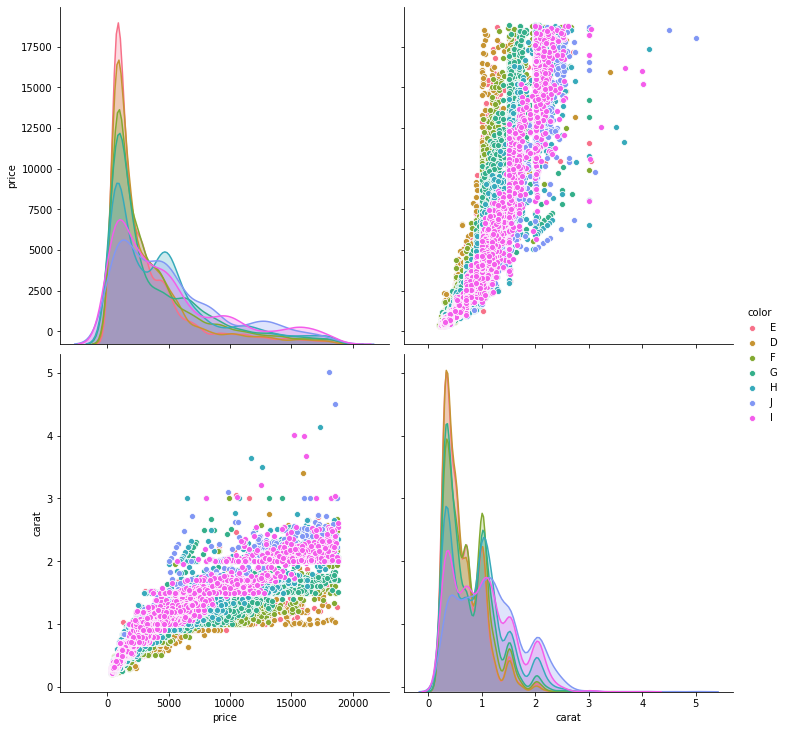

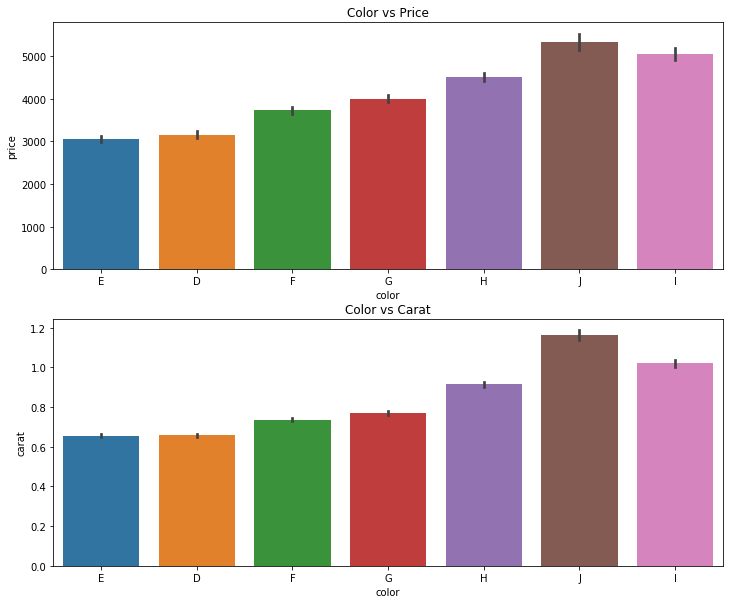

In [30]:
#Comparison of carat with price based on diamond color
sns.pairplot(diamond1[["price","carat","color"]], hue="color", height=5, palette="husl")
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="color",y="price",data = diamond1,ax=ax[0])
sns.barplot(x="color",y="carat",data = diamond1, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
plt.show()


- Diamond with J color are expensive
- Heavier diamonds are expensive

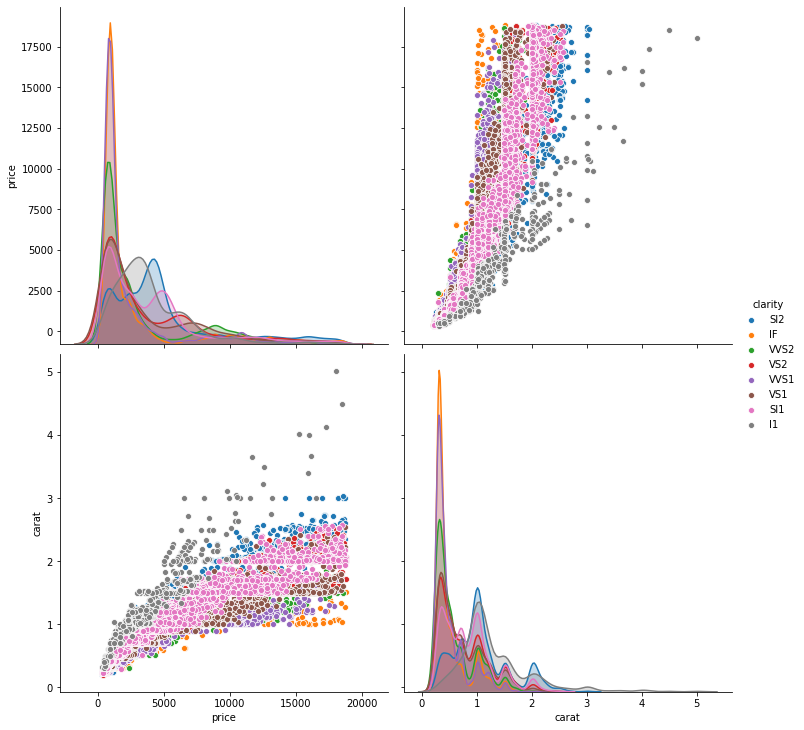

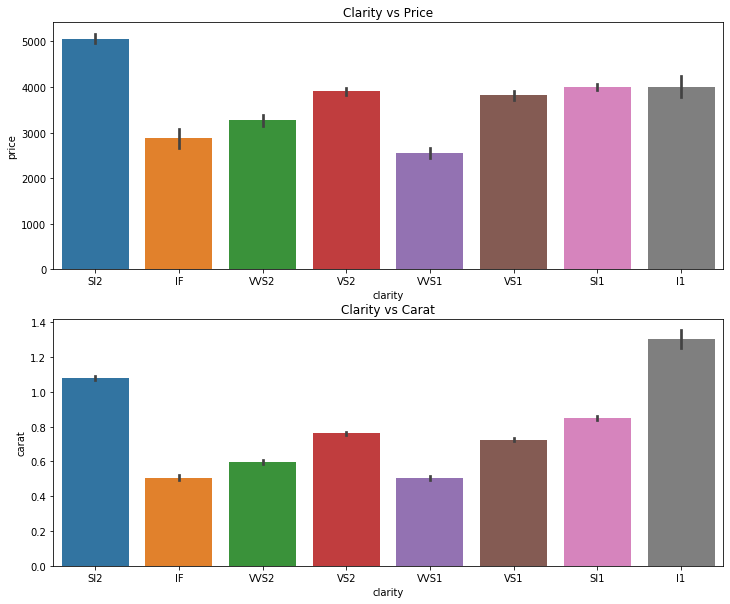

In [31]:
#Comparison of carat with price based on diamond clarity
sns.pairplot(diamond1[["price","carat","clarity"]],hue="clarity", height=5)
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="clarity",y="price",data = diamond1,ax=ax[0])
sns.barplot(x="clarity",y="carat",data = diamond1, ax=ax[1])
ax[0].set_title("Clarity vs Price")
ax[1].set_title("Clarity vs Carat")
plt.show()

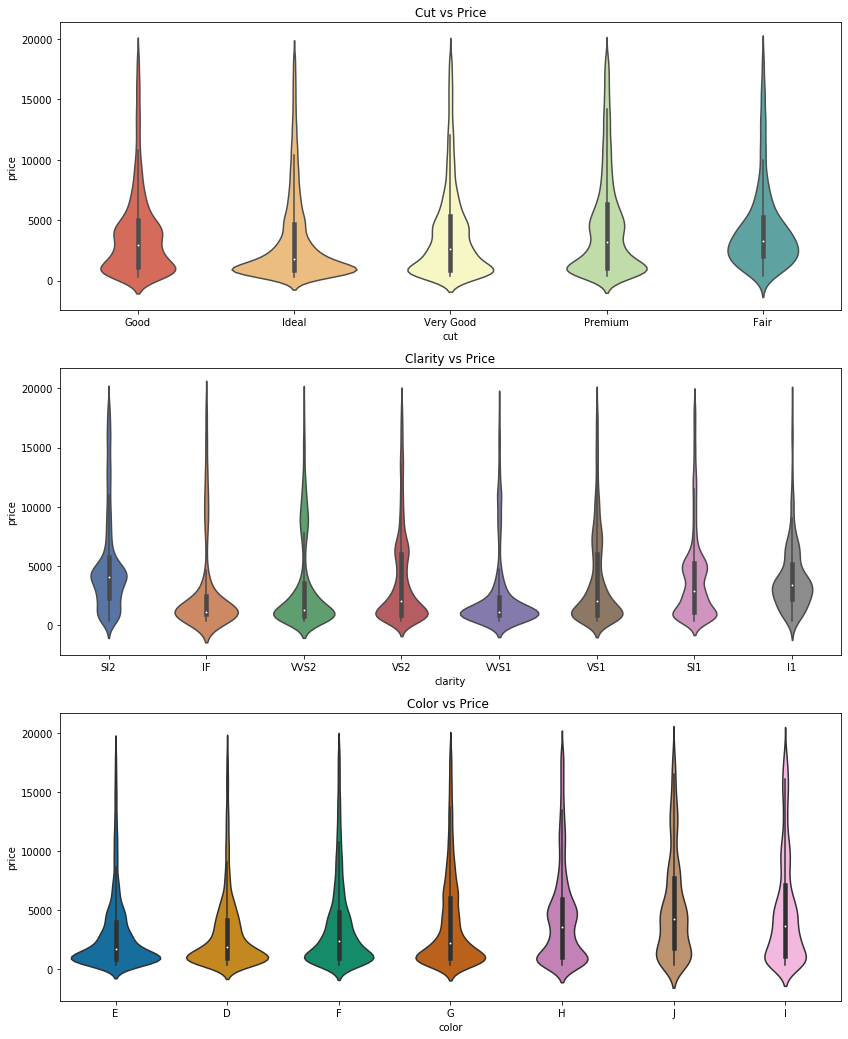

In [32]:
# some more plots
fig, ax = plt.subplots(3, figsize = (14,18))
sns.violinplot(x='cut',y='price',data = diamond1, ax=ax[0],palette="Spectral")
sns.violinplot(x='clarity',y='price',data = diamond1, ax=ax[1],palette="deep")
sns.violinplot(x='color',y='price',data = diamond1, ax=ax[2],palette="colorblind")
ax[0].set_title("Cut vs Price")
ax[1].set_title("Clarity vs Price")
ax[2].set_title("Color vs Price ")
plt.show()

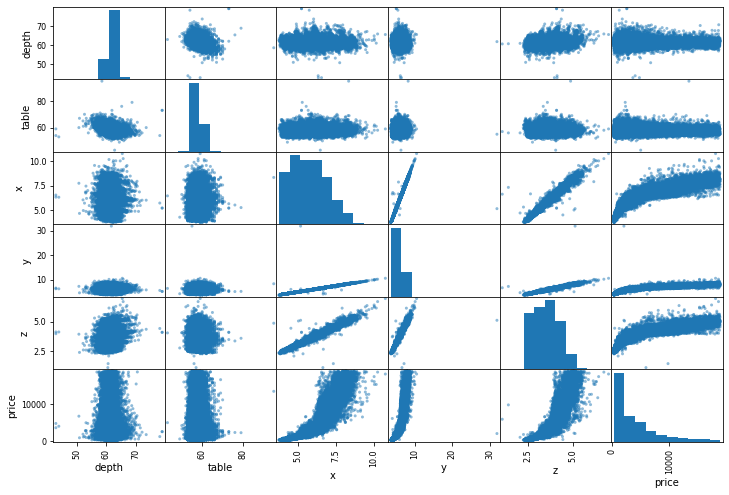

In [33]:
from pandas.plotting import scatter_matrix
attributes = ["depth","table","x","y","z","price"]
scatter_matrix(diamond1[attributes], figsize=(12, 8))
plt.show()

**Preparing data for Machine learning algorithm**

In [34]:
#removing missing value from train set diamond1
diamond1 = diamond1[diamond1.notnull().any(axis=1)]
diamond1

,carat,cut,color,clarity,depth,table,price,x,y,z
48852,0.70,Good,E,SI2,63.6,65.0,2032.0,5.67,5.55,3.57
36490,0.30,Ideal,E,IF,61.7,55.0,943.0,4.31,4.34,2.67
7352,0.93,Very Good,D,SI2,60.6,59.0,4214.0,6.30,6.34,3.83
31665,0.26,Ideal,F,IF,60.9,55.0,768.0,4.15,4.23,2.55
19326,1.01,Ideal,G,VVS2,62.2,56.0,8034.0,6.41,6.46,4.00
...,...,...,...,...,...,...,...,...,...,...
16725,0.33,Premium,H,SI1,63.0,58.0,610.0,4.42,4.40,2.78
49202,0.55,Ideal,E,VS1,61.9,55.0,2079.0,5.30,5.24,3.25
23978,2.10,Good,H,SI1,63.7,61.0,12121.0,8.10,8.07,5.15
41112,0.59,Premium,E,SI2,60.8,56.0,1195.0,5.43,5.40,3.29


[This link](https://stackoverflow.com/questions/39408109/how-to-remove-a-subset-of-a-data-frame-in-python) helps us to extract only non-missing value.

In [35]:
diamonds = diamond1.drop("price", axis=1)
diamonds_label = diamond1["price"].copy()
diamonds_only_num = diamonds.drop(["cut","clarity","color"],axis=1)

diamonds_only_num.head()

,carat,depth,table,x,y,z
48852,0.70,63.6,65.0,5.67,5.55,3.57
36490,0.30,61.7,55.0,4.31,4.34,2.67
7352,0.93,60.6,59.0,6.30,6.34,3.83
31665,0.26,60.9,55.0,4.15,4.23,2.55
19326,1.01,62.2,56.0,6.41,6.46,4.00


**Feature Scaling**  
- Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
- Therefore, it is necessary to scale all the features of diamond dataset.   
**There are two ways of doing feature scaling:**
- `min-max scaling` and 
- `standardization`  
I will use `standardization` as it is not affected by any outliers

In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diamonds_scaled_num = std_scaler.fit_transform(diamonds_only_num)

diamonds_scaled_num

array([[-0.20512333,  1.27818024,  3.37314361, -0.05378983, -0.1634395 ,
         0.04488433],
       [-1.05081482, -0.03868724, -1.09801189, -1.27004562, -1.24671611,
        -1.25705988],
       [ 0.28114927, -0.8010842 ,  0.69045031,  0.50962277,  0.54382374,
         0.42100155],
       ...,
       [ 2.75479686,  1.34748905,  1.58468141,  2.11937307,  2.09264072,
         2.33051973],
       [-0.43768849, -0.66246657, -0.65089634, -0.26842321, -0.29772999,
        -0.36016498],
       [ 0.47142986,  0.72370972, -1.09801189,  0.62588251,  0.59753994,
         0.71032249]])

In [37]:
pd.DataFrame(diamonds_scaled_num).head()

,0,1,2,3,4,5
0,-0.205123,1.278180,3.373144,-0.053790,-0.163439,0.044884
1,-1.050815,-0.038687,-1.098012,-1.270046,-1.246716,-1.257060
2,0.281149,-0.801084,0.690450,0.509623,0.543824,0.421002
3,-1.135384,-0.593158,-1.098012,-1.413135,-1.345196,-1.430652
4,0.450288,0.307857,-0.650896,0.607996,0.651256,0.666924


**Encoding Categorical Attributes**
-  we have three categorical attributes.
- ML algorithms work better with numbers.Thus, we will convert them into numbers using OneHotEncoder of scikit learn.

In [38]:
diamonds_cat = diamonds[["cut","color","clarity"]]
diamonds_cat.head()

,cut,color,clarity
48852,Good,E,SI2
36490,Ideal,E,IF
7352,Very Good,D,SI2
31665,Ideal,F,IF
19326,Ideal,G,VVS2


In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

diamonds_cat_encoded.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [40]:
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

**Transformation Pipeline**
- Feature scaling and label encoding on dataset before feeding it into ML algorithms. 
- So, to simplify the process we will create a pipeline using ColumnTransformer which successively performs feature scaling and Label encoding.

In [41]:

from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_only_num)
cat_attribs = ["cut","color","clarity"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(),num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

diamonds_prepared = pipeline.fit_transform(diamonds)

In [42]:
diamonds_prepared

array([[-0.20512333,  1.27818024,  3.37314361, ...,  0.        ,
         0.        ,  0.        ],
       [-1.05081482, -0.03868724, -1.09801189, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28114927, -0.8010842 ,  0.69045031, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.75479686,  1.34748905,  1.58468141, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43768849, -0.66246657, -0.65089634, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.47142986,  0.72370972, -1.09801189, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
pd.DataFrame(diamonds_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.205123,1.278180,3.373144,-0.053790,-0.163439,0.044884,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.050815,-0.038687,-1.098012,-1.270046,-1.246716,-1.257060,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.281149,-0.801084,0.690450,0.509623,0.543824,0.421002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.135384,-0.593158,-1.098012,-1.413135,-1.345196,-1.430652,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.450288,0.307857,-0.650896,0.607996,0.651256,0.666924,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
diamonds_prepared.shape

(43120, 26)

**Applying ML Algorithms on the Dataset**  
- Now, it is time to select a model, train it and evaluate its performance using test set. 
- First of all we will import mean_squared_error and cross_val_score from sklearn to evaluate the models.

- We will create one function that will run through each algorithm. We'll also have variables that hold results of the algorithms for future comparisons. 

- RMSE and CV_scores are used to check the performance. The function will plot a graph to show how well our algorithm has predicted the data.

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

X_test = diamond1.drop("price",axis=1)
y_test = diamond1["price"].copy()

model_name = []
rmse_train_scores = []
cv_rmse_scores = []
accuracy_models = []
rmse_test_scores = []

def model_performance(modelname,model,diamonds = diamonds_prepared, diamonds_labels = diamonds_label,
                      X_test = X_test,y_test = y_test,
                      pipeline=pipeline, cv = True):
    
    model_name.append(modelname)
    
    model.fit(diamonds,diamonds_labels)
    
    predictions = model.predict(diamonds)
    mse_train_score = mean_squared_error(diamonds_labels, predictions)
    rmse_train_score = np.sqrt(mse_train_score)
    cv_rmse = np.sqrt(-cross_val_score(model,diamonds,diamonds_labels,
                                       scoring = "neg_mean_squared_error",cv=10))
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE_Train: %.4f" %rmse_train_score)
    rmse_train_scores.append(rmse_train_score)
    print("CV_RMSE: %.4f" %cv_rmse_mean)
    cv_rmse_scores.append(cv_rmse_mean)
    
    
    print("---------------------TEST-------------------")
    
    X_test_prepared = pipeline.transform(X_test)
    
    test_predictions = model.predict(X_test_prepared)
    mse_score = mean_squared_error(y_test,test_predictions)
    rmse_score = np.sqrt(mse_score)
    
    print("RMSE_Test: %.4f" %rmse_score)
    rmse_test_scores.append(rmse_score)
    
    accuracy = (model.score(X_test_prepared,y_test)*100)
    print("accuracy: "+ str(accuracy) + "%")
    accuracy_models.append(accuracy)
    
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 5]
    some_labels = y_test.iloc[start:start + 5]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:    :", list(some_labels))
    
    
    plt.scatter(y_test,test_predictions)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "go--")
    #save_img(modelname)
    plt.show()

**Linear Regression**

RMSE_Train: 1121.0942
CV_RMSE: 1142.5566
---------------------TEST-------------------
RMSE_Test: 1121.0942
accuracy: 92.03206341600813%
Predictions: [ 589.05910503 8927.69021914 4384.86304357 -322.49499957  422.54818806]
Labels:    : [619.0, 9158.0, 4166.0, 538.0, 579.0]


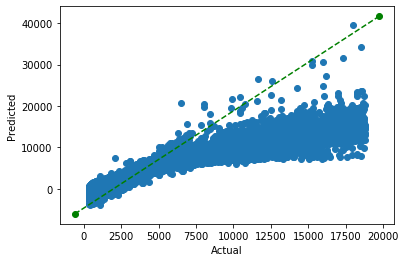

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
model_performance("Linear Regression",lin_reg)

**Decision Tree Regression**

RMSE_Train: 8.9538
CV_RMSE: 756.7906
---------------------TEST-------------------
RMSE_Test: 8.9538
accuracy: 99.99949175670099%
Predictions: [ 735. 2867.  507. 7553.  947.]
Labels:    : [735.0, 2867.0, 507.0, 7553.0, 947.0]


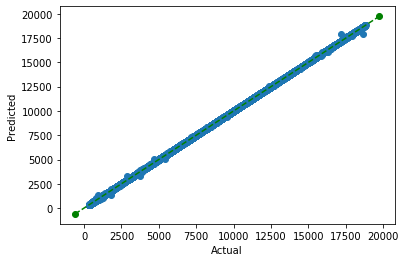

In [47]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42)
model_performance("Decision Tree Regression",dec_tree)

RMSE_Train: 242.2527
CV_RMSE: 575.6777
---------------------TEST-------------------
RMSE_Test: 242.2527
accuracy: 99.62795210132448%
Predictions: [2296.4 3770.  7644.7 2541.3 1215.1]
Labels:    : [2268.0, 3770.0, 7673.0, 2572.0, 1141.0]


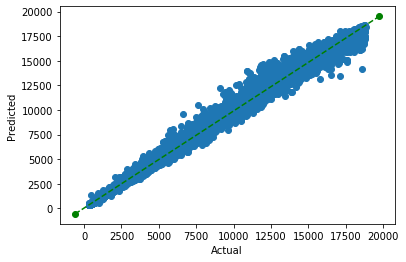

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_performance("Random Forest Regression",forest_reg)

**Ridge Regression**

RMSE_Train: 1743.9826
CV_RMSE: 1744.4755
---------------------TEST-------------------
RMSE_Test: 1743.9826
accuracy: 80.71827236824365%
Predictions: [ 488.20160483  446.97342523 5661.15385866 2027.51472501 7321.21532955]
Labels:    : [598.0, 547.0, 4819.0, 1289.0, 10724.0]


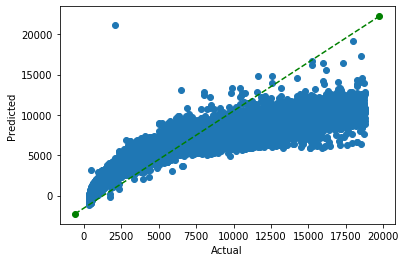

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(normalize = True)
model_performance("Ridge Regression",ridge_reg)

**Lasso Regression**

RMSE_Train: 1401.6879
CV_RMSE: 1386.9273
---------------------TEST-------------------
RMSE_Test: 1401.6879
accuracy: 87.54440999331862%
Predictions: [1048.96385876 5741.26295185 3395.11340531 1351.69283251 2638.29097094]
Labels:    : [1107.0, 6666.0, 2859.0, 1120.0, 2061.0]


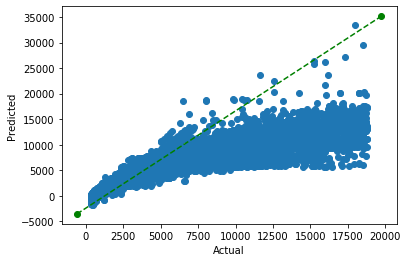

In [50]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(normalize = True)
model_performance("Lasso Regression",lasso_reg)

**Elastic Net Regression**

RMSE_Train: 1698.3671
CV_RMSE: 1698.6799
---------------------TEST-------------------
RMSE_Test: 1698.3671
accuracy: 81.7137445794116%
Predictions: [ 5207.9567463    375.56947251  4065.58845435 13399.54760127
  4191.35411389]
Labels:    : [5653.0, 626.0, 2682.0, 16709.0, 3459.0]


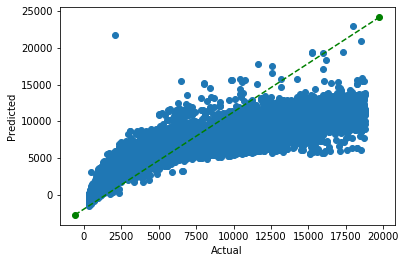

In [51]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet()
model_performance("Elastic Net Regression",net_reg)

**Ada Boost Regression**

RMSE_Train: 1581.8776
CV_RMSE: 1518.1113
---------------------TEST-------------------
RMSE_Test: 1581.8776
accuracy: 84.13619298130774%
Predictions: [1410.53706897 4571.534      6165.37703781 4429.97683122 2145.12561576]
Labels:    : [680.0, 2663.0, 4965.0, 2703.0, 1181.0]


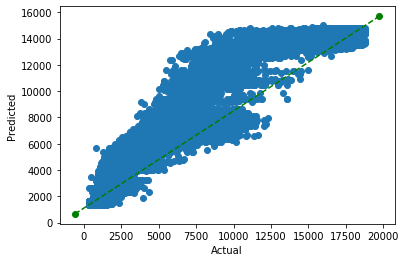

In [52]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100)
model_performance("Ada Boost Regression",ada_reg)

**Gradient Boosting Regression**

RMSE_Train: 1223.6333
CV_RMSE: 1230.2717
---------------------TEST-------------------
RMSE_Test: 1223.6333
accuracy: 90.50785854100182%
Predictions: [6909.7469947  3614.21629063 2063.58748329 1113.32485759 6445.95313445]
Labels:    : [6484.0, 3387.0, 1832.0, 876.0, 6320.0]


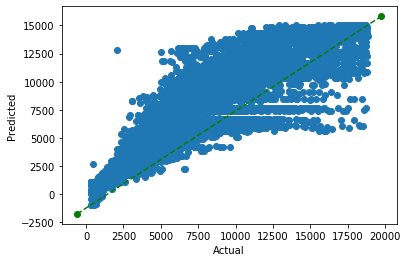

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
model_performance("Gradient Boosting Regression",grad_reg)

**Comparing the Accuracies of different Regression Models**

In [54]:
compare_models = pd.DataFrame({"Algorithms" : model_name, "Models RMSE" : rmse_test_scores, 
                               "CV RMSE Mean" : cv_rmse_scores, "Accuracy" : accuracy_models})
compare_models.sort_values(by = "Accuracy", ascending=False)

,Algorithms,Models RMSE,CV RMSE Mean,Accuracy
1,Decision Tree Regression,8.953751,756.790614,99.999492
2,Random Forest Regression,242.252687,575.677714,99.627952
0,Linear Regression,1121.094210,1142.556552,92.032063
7,Gradient Boosting Regression,1223.633268,1230.271735,90.507859
4,Lasso Regression,1401.687910,1386.927323,87.544410
6,Ada Boost Regression,1581.877629,1518.111287,84.136193
5,Elastic Net Regression,1698.367091,1698.679939,81.713745
3,Ridge Regression,1743.982598,1744.475480,80.718272


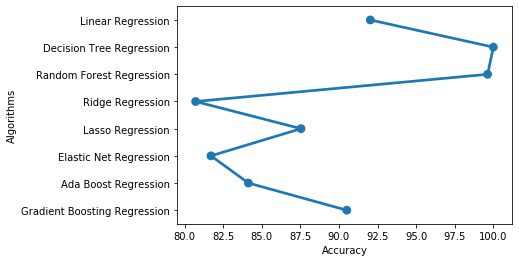

In [55]:
sns.pointplot("Accuracy","Algorithms",data=pd.DataFrame({'Algorithms':model_name,"Accuracy":accuracy_models}))

**Conlusion**

Decision Tree Regression performs better as it has good accuracy 